In [1]:
import sys
sys.path.insert(1, '../')
import topology_interface_main as tim
import haldane_model as verify
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import z2pack
import verification_utils as utils
#import yaehmop_tools


# Description of Interface Workflow

# Verification of Interface in 1D, 2D using SSH model, Haldane Model, and BHZ model

# 1D: SSH Model

The Su-Schrieffer-Heeger (SSH) Model describes trans-polyacetlyene
periodic SSH Hamiltonian Results in a chern number of 1 when t2>t1


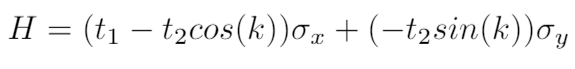

In [3]:
from IPython.display import Image
print("The Su-Schrieffer-Heeger (SSH) Model describes trans-polyacetlyene")
print("periodic SSH Hamiltonian Results in a chern number of 1 when t2>t1")
Image(filename="figures/ssh_ham.png")

#source: https://arxiv.org/pdf/1906.08435.pdf

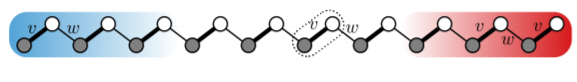

In [4]:
Image(filename="figures/ssh_figure.png")


+----------------------------------------------------------------------+
|================                                                      |
|LINE CALCULATION                                                      |
|================                                                      |
|starting at 2021-08-24 19:33:36,868                                   |
|running Z2Pack version 2.2.0                                          |
|                                                                      |
|iterator: range(9, 40)                                                |
|line:     <function get_topology.<loc<...>mbda> at 0x000002CB78C9DCA0>|
|pos_tol:  None                                                        |
|system:   <z2pack.hm.System object at 0x000002CB78CB6730>             |
+----------------------------------------------------------------------+

INFO: 0 of 1 line convergence criteria fulfilled.
INFO:       Calculating line for N = 9
INFO: 1 of 1 line convergence cri

+----------------------------------------------------------------------+
|                       ==================                             |
|                       CONVERGENCE REPORT                             |
|                       ==================                             |
|                                                                      |
|                       ForceFirstUpdate: PASSED                       |
+----------------------------------------------------------------------+

+----------------------------------------------------------------------+
|================                                                      |
|LINE CALCULATION                                                      |
|================                                                      |
|starting at 2021-08-24 19:33:37,094                                   |
|running Z2Pack version 2.2.0                                          |
|                                                 

INFO: 0 of 1 line convergence criteria fulfilled.
INFO:       Calculating line for N = 9
INFO: 1 of 1 line convergence criteria fulfilled.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                       ==================                             |
|                       CONVERGENCE REPORT                             |
|                       ==================                             |
|                                                                      |
|                       ForceFirstUpdate: PASSED                       |
+----------------------------------------------------------------------+

+----------------------------------------------------------------------+
|================                                       

INFO: 0 of 1 line convergence criteria fulfilled.
INFO:       Calculating line for N = 9
INFO: 1 of 1 line convergence criteria fulfilled.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                       ==================                             |
|                       CONVERGENCE REPORT                             |
|                       ==================                             |
|                                                                      |
|                       ForceFirstUpdate: PASSED                       |
+----------------------------------------------------------------------+

+----------------------------------------------------------------------+
|================                                       

INFO: 0 of 1 line convergence criteria fulfilled.
INFO:       Calculating line for N = 9
INFO: 1 of 1 line convergence criteria fulfilled.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                       ==================                             |
|                       CONVERGENCE REPORT                             |
|                       ==================                             |
|                                                                      |
|                       ForceFirstUpdate: PASSED                       |
+----------------------------------------------------------------------+


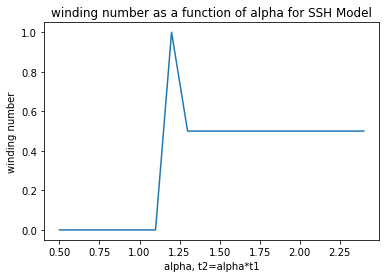

In [4]:
#Calculating chern number as a function of alpha, t2=alpha*t1
#transition at alpha =1, t1=t2
alpha=np.arange(0.5,2.5,0.1)
fname="ssh_output.OUT"
chern_=[]
for a in alpha:
    k_vect=tim.generate_k_1D(nkx=10)
    hamiltonian=verify.ssh_hamiltonian(a,t1=-1.0)
    #create Mock Yaehmop output file from Hamiltonian Data and kpoints
    verify.write_yaehmop_output_from_ham(fname,k_vect,hamiltonian)
    c,z = tim.get_topology(fname,ham_type="general")
    chern_.append(c)


plt.plot(alpha,chern_)
plt.title("winding number as a function of alpha for SSH Model")
plt.ylabel("winding number")
plt.xlabel("alpha, t2=alpha*t1")
plt.show()

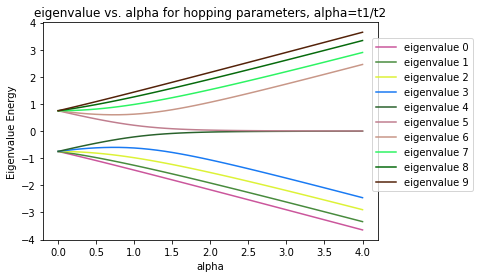

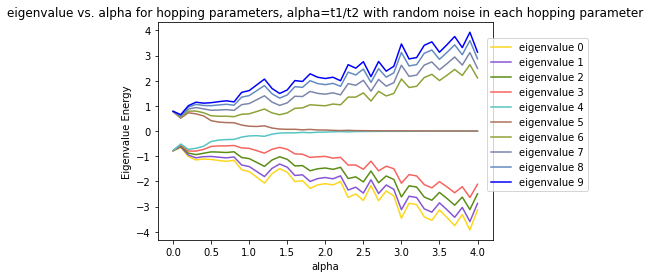

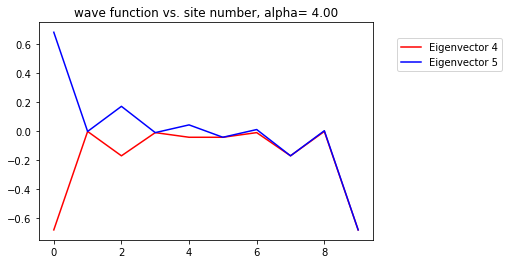

Key observations:
two eigenvalues converge to zero as alpha is increased even when random noise is introduced --> these are protected states
These zero energy states have wave functions that are localized at the end of the polymer


In [5]:
#finite SSH

#create system, set constants
num_unit_cells=4.5
alpha=np.arange(0,4.1,0.1)
e=1
t1=0.1

eigval_vect_dict,ham=utils.vary_alpha(num_unit_cells,alpha)

#plotting eigenvalues
for i,a in enumerate(eigval_vect_dict["eigenvalues"][0,:]):
    color=np.random.rand(3)
    plt.plot(alpha,eigval_vect_dict["eigenvalues"][:,i],label="eigenvalue "+str(i),color=color)
plt.xlabel("alpha")
plt.ylabel("Eigenvalue Energy")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 0.95))
plt.title("eigenvalue vs. alpha for hopping parameters, alpha=t1/t2")
plt.show()

#introduce noise in t1,t2
eigval_vect_dict,ham=utils.vary_alpha(num_unit_cells,alpha,glass=True)

for i,a in enumerate(eigval_vect_dict["eigenvalues"][0,:]):
    color=np.random.rand(3)
    plt.plot(alpha,eigval_vect_dict["eigenvalues"][:,i],label="eigenvalue "+str(i),color=color)
plt.xlabel("alpha")
plt.ylabel("Eigenvalue Energy")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 0.95))
plt.title("eigenvalue vs. alpha for hopping parameters, alpha=t1/t2 with random noise in each hopping parameter")
plt.show()

#plotting eigenvectors corresponding to zero energy eigenvalues
r=np.linspace(-num_unit_cells,0,len(eigval_vect_dict["eigenvectors"][0,:]))
a_val=-1
wf1=eigval_vect_dict["eigenvectors"][a_val,:,int(num_unit_cells)] 
wf2=eigval_vect_dict["eigenvectors"][a_val,:,int(num_unit_cells)+1] 
plt.plot(range(int(2*num_unit_cells+1)),wf1,color="red",label="Eigenvector " +str(int(num_unit_cells)))
plt.plot(range(int(2*num_unit_cells+1)),wf2,color="blue",label="Eigenvector " +str(int(num_unit_cells)+1))
plt.title("wave function vs. site number, alpha= "+"{:.2f}".format(alpha[a_val]))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, .95))
plt.show()

print("Key observations:")
print("two eigenvalues converge to zero as alpha is increased even when random noise is introduced --> these are protected states")
print("These zero energy states have wave functions that are localized at the end of the polymer")

# 2D: Haldane Model, non-zero chern number

Haldane Hamiltonian Results in a chern number of 1.0
hamiltonian includes two atom types, first and second neighbor hopping, and a hexagonal lattice


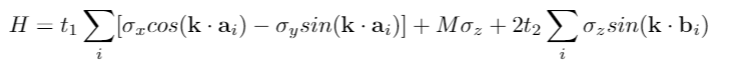

In [6]:
print("Haldane Hamiltonian Results in a chern number of 1.0")
print("hamiltonian includes two atom types, first and second neighbor hopping, and a hexagonal lattice")
Image(filename="figures/haldane_ham.png")
#source https://topocondmat.org/w4_haldane/haldane_model.html

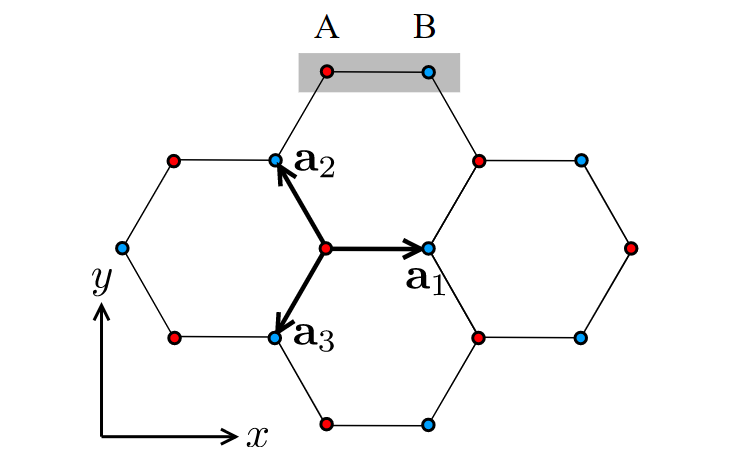

In [7]:
Image(filename="figures/haldane_figure.png")


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-08-24 19:34:02,883                                   |
|running Z2Pack version 2.2.0                                          |
|                                                                      |
|gap_tol:   None                                                       |
|iterator:  range(10, 40)                                              |
|move_tol:  None                                                       |
|num_lines: 10                                                         |
|pos_tol:   None                                                       |
|surface:   <function get_topology.<loc<...>bda> at 0x000002CB767F7C10>|
|system:    <z2pack.hm.System object at 0x000002CB

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-08-24 19:34:03,206                                   |
|running Z2Pack version 2.2.0                                          |
|                                                                      |
|gap_tol:   None                                                       |
|iterator:  range(10, 40)                                              |
|move_tol:  None                                                       |
|num_lines: 10                                                         |
|pos_tol:   None                                                       |
|surface:   <function get_topology.<loc<...>bda> at 0x000002CB78D184C0>|
|system:    <z2pack.hm.System object at 0x000002CB

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-08-24 19:34:03,512                                   |
|running Z2Pack version 2.2.0                                          |
|                                                                      |
|gap_tol:   None                                                       |
|iterator:  range(10, 40)                                              |
|move_tol:  None                                                       |
|num_lines: 10                                                         |
|pos_tol:   None                                                       |
|surface:   <function get_topology.<loc<...>bda> at 0x000002CB76767700>|
|system:    <z2pack.hm.System object at 0x000002CB

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-08-24 19:34:03,830                                   |
|running Z2Pack version 2.2.0                                          |
|                                                                      |
|gap_tol:   None                                                       |
|iterator:  range(10, 40)                                              |
|move_tol:  None                                                       |
|num_lines: 10                                                         |
|pos_tol:   None                                                       |
|surface:   <function get_topology.<loc<...>bda> at 0x000002CB78D184C0>|
|system:    <z2pack.hm.System object at 0x000002CB

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-08-24 19:34:04,131                                   |
|running Z2Pack version 2.2.0                                          |
|                                                                      |
|gap_tol:   None                                                       |
|iterator:  range(10, 40)                                              |
|move_tol:  None                                                       |
|num_lines: 10                                                         |
|pos_tol:   None                                                       |
|surface:   <function get_topology.<loc<...>bda> at 0x000002CB76767700>|
|system:    <z2pack.hm.System object at 0x000002CB

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-08-24 19:34:04,435                                   |
|running Z2Pack version 2.2.0                                          |
|                                                                      |
|gap_tol:   None                                                       |
|iterator:  range(10, 40)                                              |
|move_tol:  None                                                       |
|num_lines: 10                                                         |
|pos_tol:   None                                                       |
|surface:   <function get_topology.<loc<...>bda> at 0x000002CB76767700>|
|system:    <z2pack.hm.System object at 0x000002CB

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-08-24 19:34:04,738                                   |
|running Z2Pack version 2.2.0                                          |
|                                                                      |
|gap_tol:   None                                                       |
|iterator:  range(10, 40)                                              |
|move_tol:  None                                                       |
|num_lines: 10                                                         |
|pos_tol:   None                                                       |
|surface:   <function get_topology.<loc<...>bda> at 0x000002CB76767700>|
|system:    <z2pack.hm.System object at 0x000002CB

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              

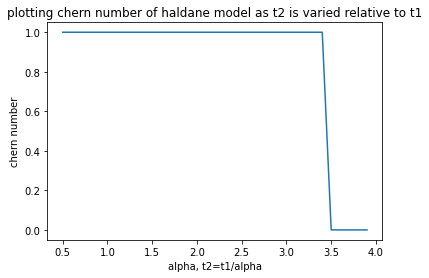

In [8]:
#get topology of Haldane model as a test, Haldane model results placed in Yaehmop-like output file to test functions

alpha=np.arange(0.5,4.0,0.1)
m, t1, phi=0.5, 1., 0.5 * np.pi
k_vect=tim.generate_k_2D()
fname="haldane_output.OUT"
chern_=[]
z2_=[]
for a in alpha:
    ham=verify.haldane_hamiltonian(m,t1,t1/a,phi)
    verify.write_yaehmop_output_from_ham(fname,k_vect,ham)
    c, z = tim.get_topology(fname,ham_type="general")
    chern_.append(c)
    z2_.append(z)
chern_=np.array(chern_)
z2_=np.array(z2_)

plt.plot(alpha,chern_)
plt.title("plotting chern number of haldane model as t2 is varied relative to t1")
plt.xlabel("alpha, t2=t1/alpha")
plt.ylabel("chern number")
plt.show()

# 2D: Bernevig Hughes Zhang model

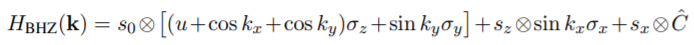

In [9]:
Image(filename="figures/bhz_ham.png")


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-08-24 20:23:25,408                                   |
|running Z2Pack version 2.2.0                                          |
|                                                                      |
|gap_tol:   None                                                       |
|iterator:  range(10, 40)                                              |
|move_tol:  None                                                       |
|num_lines: 10                                                         |
|pos_tol:   None                                                       |
|surface:   <function get_topology.<loc<...>bda> at 0x000002CB797E23A0>|
|system:    <z2pack.hm.System object at 0x000002CB

..\topology_interface_main.py:422: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if surfaces=="default":


INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|                                                                      |
|                         Line Convergence                             |
|                         ================                             |
|                                                                      |
|                             ForceFirstUpdate             

INFO: Adding lines required by 'num_lines'.
INFO: Adding line at t = 0.0
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.1111111111111111
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.2222222222222222
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.3333333333333333
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.4444444444444444
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|   


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-08-24 20:23:26,530                                   |
|running Z2Pack version 2.2.0                                          |
|                                                                      |
|gap_tol:   None                                                       |
|iterator:  range(10, 40)                                              |
|move_tol:  None                                                       |
|num_lines: 10                                                         |
|pos_tol:   None                                                       |
|surface:   <function get_topology.<loc<...>bda> at 0x000002CB78D26D30>|
|system:    <z2pack.hm.System object at 0x000002CB

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-08-24 20:23:27,485                                   |
|running Z2Pack version 2.2.0                                          |
|                                                                      |
|gap_tol:   None                                                       |
|iterator:  range(10, 40)                                              |
|move_tol:  None                                                       |
|num_lines: 10                                                         |
|pos_tol:   None                                                       |
|surface:   <function get_topology.<loc<...>bda> at 0x000002CB78D26D30>|
|system:    <z2pack.hm.System object at 0x000002CB

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-08-24 20:23:28,438                                   |
|running Z2Pack version 2.2.0                                          |
|                                                                      |
|gap_tol:   None                                                       |
|iterator:  range(10, 40)                                              |
|move_tol:  None                                                       |
|num_lines: 10                                                         |
|pos_tol:   None                                                       |
|surface:   <function get_topology.<loc<...>bda> at 0x000002CB79832820>|
|system:    <z2pack.hm.System object at 0x000002CB

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              

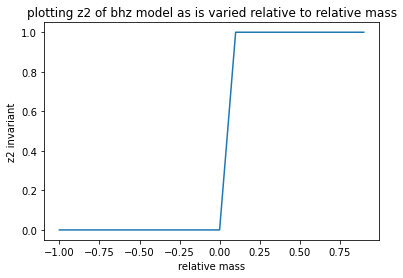

In [16]:
alpha=np.arange(-1.0,1.0,0.1)


fname="bhz_output.OUT"
chern_=[]
z2_=[]
bhz_edge_surfaces=np.array([(0,1/2),(0,1),(0,0)])
n=10
for a in alpha:
    k_vect=tim.generate_k_2D(n=n,surfaces=bhz_edge_surfaces)
    ham=verify.bhz(0.5, 1, 0., 0, a)
    verify.write_yaehmop_output_from_ham(fname,k_vect,ham)
    c, z = tim.get_topology(fname,ham_type="general")
    chern_.append(c)
    z2_.append(z)
chern_=np.array(chern_)
z2_=np.array(z2_)

plt.plot(alpha,z2_)
plt.title("plotting z2 of bhz model as is varied relative to relative mass")
plt.xlabel("relative mass")
plt.ylabel("z2 invariant")
plt.show()

# 3D BHZ Model


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-24 20:52:51,889                                  |
| running Z2Pack version 2.2.0                                         |
|                                                                      |
| gap_tol:   None                                                      |
| iterator:  range(10, 40)                                             |
| move_tol:  None                                                      |
| num_lines: 10                                                        |
| pos_tol:   None                                                      |
| surface:   <function z2_3d.<locals>.<lambda> at 0x000001DA4888C1F0>  |
| system:    <z2pack.hm.System object at 0x000001D

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-24 20:52:52,065                                  |
| running Z2Pack version 2.2.0                                         |
|                                                                      |
| gap_tol:   None                                                      |
| iterator:  range(10, 40)                                             |
| move_tol:  None                                                      |
| num_lines: 10                                                        |
| pos_tol:   None                                                      |
| surface:   <function z2_3d.<locals>.<lambda> at 0x000001DA463E85E0>  |
| system:    <z2pack.hm.System object at 0x000001D

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-24 20:52:52,446                                  |
| running Z2Pack version 2.2.0                                         |
|                                                                      |
| gap_tol:   None                                                      |
| iterator:  range(10, 40)                                             |
| move_tol:  None                                                      |
| num_lines: 10                                                        |
| pos_tol:   None                                                      |
| surface:   <function z2_3d.<locals>.<lambda> at 0x000001DA49008A60>  |
| system:    <z2pack.hm.System object at 0x000001D

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-24 20:52:52,872                                  |
| running Z2Pack version 2.2.0                                         |
|                                                                      |
| gap_tol:   None                                                      |
| iterator:  range(10, 40)                                             |
| move_tol:  None                                                      |
| num_lines: 10                                                        |
| pos_tol:   None                                                      |
| surface:   <function z2_3d.<locals>.<lambda> at 0x000001DA4888C1F0>  |
| system:    <z2pack.hm.System object at 0x000001D

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-24 20:52:53,281                                  |
| running Z2Pack version 2.2.0                                         |
|                                                                      |
| gap_tol:   None                                                      |
| iterator:  range(10, 40)                                             |
| move_tol:  None                                                      |
| num_lines: 10                                                        |
| pos_tol:   None                                                      |
| surface:   <function z2_3d.<locals>.<lambda> at 0x000001DA49008AF0>  |
| system:    <z2pack.hm.System object at 0x000001D

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-24 20:52:53,676                                  |
| running Z2Pack version 2.2.0                                         |
|                                                                      |
| gap_tol:   None                                                      |
| iterator:  range(10, 40)                                             |
| move_tol:  None                                                      |
| num_lines: 10                                                        |
| pos_tol:   None                                                      |
| surface:   <function z2_3d.<locals>.<lambda> at 0x000001DA49008DC0>  |
| system:    <z2pack.hm.System object at 0x000001D

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-24 20:52:54,051                                  |
| running Z2Pack version 2.2.0                                         |
|                                                                      |
| gap_tol:   None                                                      |
| iterator:  range(10, 40)                                             |
| move_tol:  None                                                      |
| num_lines: 10                                                        |
| pos_tol:   None                                                      |
| surface:   <function z2_3d.<locals>.<lambda> at 0x000001DA463E85E0>  |
| system:    <z2pack.hm.System object at 0x000001D

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-24 20:52:54,244                                  |
| running Z2Pack version 2.2.0                                         |
|                                                                      |
| gap_tol:   None                                                      |
| iterator:  range(10, 40)                                             |
| move_tol:  None                                                      |
| num_lines: 10                                                        |
| pos_tol:   None                                                      |
| surface:   <function z2_3d.<locals>.<lambda> at 0x000001DA49008B80>  |
| system:    <z2pack.hm.System object at 0x000001D

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-24 20:52:54,626                                  |
| running Z2Pack version 2.2.0                                         |
|                                                                      |
| gap_tol:   None                                                      |
| iterator:  range(10, 40)                                             |
| move_tol:  None                                                      |
| num_lines: 10                                                        |
| pos_tol:   None                                                      |
| surface:   <function z2_3d.<locals>.<lambda> at 0x000001DA49008EE0>  |
| system:    <z2pack.hm.System object at 0x000001D

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-24 20:52:55,041                                  |
| running Z2Pack version 2.2.0                                         |
|                                                                      |
| gap_tol:   None                                                      |
| iterator:  range(10, 40)                                             |
| move_tol:  None                                                      |
| num_lines: 10                                                        |
| pos_tol:   None                                                      |
| surface:   <function z2_3d.<locals>.<lambda> at 0x000001DA463E85E0>  |
| system:    <z2pack.hm.System object at 0x000001D

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-24 20:52:55,422                                  |
| running Z2Pack version 2.2.0                                         |
|                                                                      |
| gap_tol:   None                                                      |
| iterator:  range(10, 40)                                             |
| move_tol:  None                                                      |
| num_lines: 10                                                        |
| pos_tol:   None                                                      |
| surface:   <function z2_3d.<locals>.<lambda> at 0x000001DA49008700>  |
| system:    <z2pack.hm.System object at 0x000001D

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-24 20:52:55,818                                  |
| running Z2Pack version 2.2.0                                         |
|                                                                      |
| gap_tol:   None                                                      |
| iterator:  range(10, 40)                                             |
| move_tol:  None                                                      |
| num_lines: 10                                                        |
| pos_tol:   None                                                      |
| surface:   <function z2_3d.<locals>.<lambda> at 0x000001DA490089D0>  |
| system:    <z2pack.hm.System object at 0x000001D

INFO: Adding line at t = 0.5555555555555556
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6666666666666666
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7777777777777777
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8888888888888888
INFO:       Calculating line for N = 10
INFO: Adding line at t = 1.0
INFO:       Calculating line for N = 10
INFO: Convergence criteria fulfilled for 9 of 9 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 0s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|              

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]]


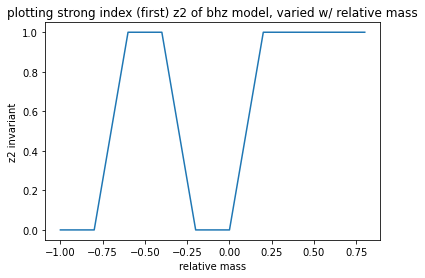

In [3]:
mass=np.arange(-1,1,0.2)
z2_=[]
bhz_edge_surfaces=np.array([[(1,1),(0,1/2),(0,1)],
                        [(0,1/2),(1,1),(0,1)],
                        [(0,1/2),(0,1),(1,1)],
                        [(0,0),(0,1/2),(0,1)],
                        [(0,1/2),(0,0),(0,1)],
                        [(0,1/2),(0,1),(0,0)],
                        ])
n=10
fname="bhz_output3d.OUT"
for m in mass:
    k_vect=tim.generate_k_3D(n=n,surfaces=bhz_edge_surfaces)
    ham=verify.bhz_3D(.5, 1,0,0, m) 
    verify.write_yaehmop_output_from_ham(fname,k_vect,ham)
    c,z  = tim.get_topology(fname,ham_type="general",surfaces=bhz_edge_surfaces,n=n)
    z2_.append(z)
z2_=np.array(z2_)
print(z2_)
plt.plot(mass,z2_[:,0])
plt.title("plotting strong index (first) z2 of bhz model, varied w/ relative mass")
plt.xlabel("relative mass")
plt.ylabel("z2 invariant")
plt.show()

# Using interface to detect topologically non-trivial materials from POSCAR files

In [5]:
input_POSCAR="bhz_output3d.OUT"

#get topology of Yaehmop output file structure

output_yaehmop_filename="mp-47.OUT"
z2_ = tim.get_topology(output_yaehmop_filename)
print(z2_)


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-04 15:45:12,461                                  |
| running Z2Pack version 2.1.1                                         |
|                                                                      |
| gap_tol:            None                                             |
| init_result:        None                                             |
| iterator:           range(17, 40)                                    |
| load:               False                                            |
| load_quiet:         True                                             |
| min_neighbour_dist: 0.01                                             |
| move_tol:           None                        

ValueError: Start and end points of the line differ by [0.     0.     0.3333], which is not an inverse lattice vector.